In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import os

from PIL import Image
import requests
from io import BytesIO

In [18]:
url = 'https://raw.githubusercontent.com/msmx2022/4-models/main/3-Dimensionality-Reduction/Lenna.bmp'

response = requests.get(url)
image_data = BytesIO(response.content)

In [19]:
oriImage = Image.open(image_data)

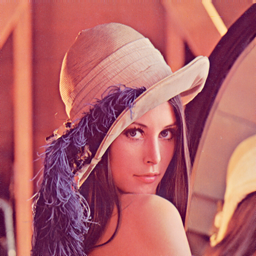

In [20]:
oriImage

In [21]:
imgArray = np.array(oriImage)

In [22]:
print(imgArray.shape)

(256, 256, 3)


In [23]:
imgArray

array([[[226, 137, 125],
        [223, 137, 133],
        [226, 138, 120],
        ...,
        [229, 144, 129],
        [234, 149, 123],
        [221, 130, 110]],

       [[226, 137, 125],
        [223, 137, 133],
        [226, 138, 120],
        ...,
        [229, 144, 129],
        [234, 149, 123],
        [221, 130, 110]],

       [[226, 137, 125],
        [223, 137, 133],
        [225, 134, 119],
        ...,
        [231, 144, 127],
        [234, 146, 120],
        [221, 130, 110]],

       ...,

       [[ 88,  26,  57],
        [ 97,  35,  64],
        [ 96,  28,  61],
        ...,
        [132,  47,  70],
        [151,  60,  73],
        [161,  55,  69]],

       [[ 86,  23,  60],
        [ 91,  27,  57],
        [ 93,  26,  62],
        ...,
        [145,  60,  79],
        [167,  67,  80],
        [166,  67,  77]],

       [[ 82,  22,  57],
        [ 96,  32,  62],
        [ 97,  30,  65],
        ...,
        [162,  68,  80],
        [177,  66,  77],
        [181,  71,  81]]

In [24]:
R = imgArray[:,:,0]
G = imgArray[:,:,1]
B = imgArray[:,:,2]

In [25]:
R

array([[226, 223, 226, ..., 229, 234, 221],
       [226, 223, 226, ..., 229, 234, 221],
       [226, 223, 225, ..., 231, 234, 221],
       ...,
       [ 88,  97,  96, ..., 132, 151, 161],
       [ 86,  91,  93, ..., 145, 167, 166],
       [ 82,  96,  97, ..., 162, 177, 181]], dtype=uint8)

In [27]:
print("R.shape = ",R.shape)
print("G.shape = ",G.shape)
print("B.shape = ",B.shape)

R.shape =  (256, 256)
G.shape =  (256, 256)
B.shape =  (256, 256)


In [39]:
def imgCompress(channel,percent):
    U,sigma,VT = np.linalg.svd(channel)
    m = U.shape[0]
    n = VT.shape[0]
    reChannel = np.zeros((m,n))

    for k in range(len(sigma)):
        reChannel = reChannel + np.dot(sigma[k]*U[:,k].reshape(-1,1),VT[k,:].reshape(-1,1).T)

        if float(k)/len(sigma) > percent:
            reChannel[reChannel<0]=0 #svd输出值不一定收缩在0-225之间，但图像的像素值通常范围在 0 到 255 之间
            reChannel[reChannel>255]=255
            break
        #if～break 结构的作用：在循环中检查当前压缩程度是否达到预设的百分比，如果达到了就立即停止迭代

    return np.rint(reChannel).astype("uint8")

In [87]:
compress_ratio = [0.001,0.1,0.5,0.7,0.9]

for p in compress_ratio:
    reR = imgCompress(R,p)
    reG = imgCompress(G,p)
    reB = imgCompress(B,p)

    reI = np.stack((reR,reG,reB),2)
    Image.fromarray(reI).save("{}".format(p)+"img.bmp")
    

In [46]:
current_dir = os.getcwd()

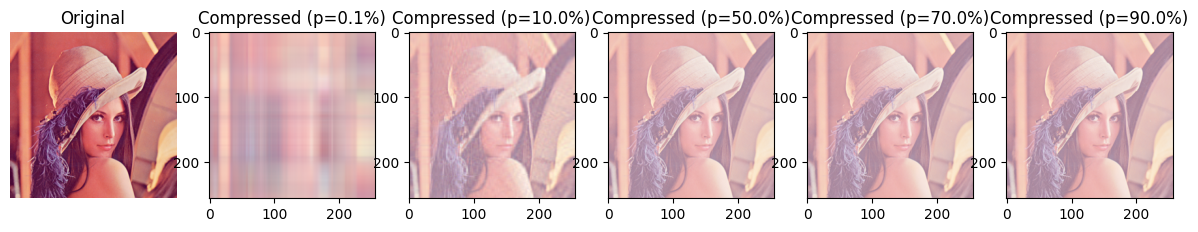

In [88]:
# 创建一个新的 Matplotlib 图形
plt.figure(figsize=(15, 5))

# 在第一个子图中显示原始图片
plt.subplot(1, len(compress_ratio)+1, 1)
plt.imshow(oriImage)
plt.title('Original')
plt.axis('off')

# 遍历不同的压缩比例
for i, p in enumerate(compress_ratio):
    # 打开当前压缩比例对应的图像
    compressed_img = Image.open('{}'.format(current_dir) + '\\{}img.bmp'.format(p))

    # 在图形中添加子图，并显示原始图像和当前压缩比例对应的图像
    plt.subplot(1, len(compress_ratio)+1, i+2)
    plt.imshow(compressed_img, alpha=0.5)  # 使用alpha参数控制被压缩图像的透明度
    plt.title('Compressed (p={}%)'.format(p*100))

# 显示图形
plt.show()

In [86]:
#Image.open('{}'.format(current_dir) + '\\0.001img.bmp')